In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
import pandas as pd
from scipy import stats
from sklearn import metrics
plt.rcParams["figure.figsize"] = (20,12)

import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
# loading images
train_img = [cv2.imread(file) for file in glob.glob('./P6/pratheepan/train/set1/images/*')]
train_label = [cv2.imread(file) for file in glob.glob('./P6/pratheepan/train/set1/groundtruth/*')]

In [3]:
# Calculating Prior prob
P_skin = 0
P_non_skin = 0

skin_pix = []
non_skin_pix = []

for i in range(len(train_label)):
    for _ in range(train_label[i].shape[0]):
        for __ in range(train_label[i].shape[1]):
            if train_label[i][_][__][0] == 255 :
                P_skin += 1
                skin_pix.append(train_img[i][_][__])
            else:
                P_non_skin +=1
                non_skin_pix.append(train_img[i][_][__])
                
P_skin,P_non_skin =  P_skin/(P_skin+P_non_skin), P_non_skin/(P_skin+P_non_skin)    


In [4]:
# Mean calculation
non_skin_mean = np.mean(non_skin_pix)
skin_mean = np.mean(skin_pix)

# Variance calculation
non_skin_var = np.var(non_skin_pix)
skin_var = np.var(skin_pix)


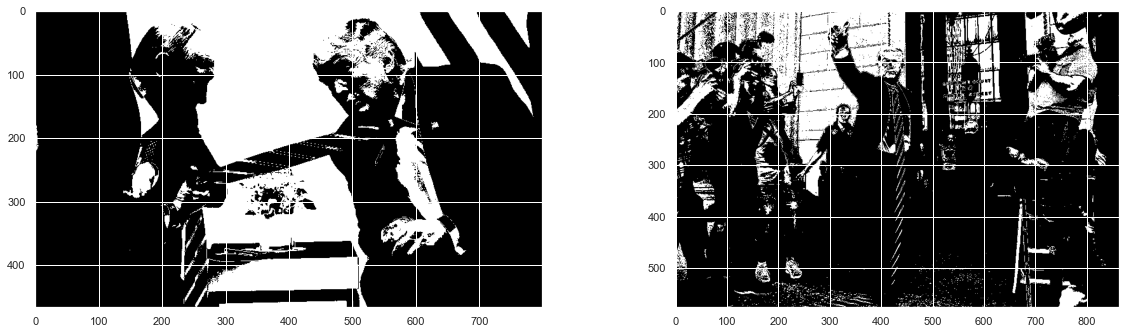

In [7]:
# multivariate normal pdf function to calculate prob of each pixel
skin_pdf = stats.multivariate_normal(skin_mean,skin_var)
non_skin_pdf = stats.multivariate_normal(non_skin_mean,non_skin_var)

# Bayes Skin Classifier
def BayesSkinClassifier(images,cost=1.685):
    plot_index = 1
    threshold = P_non_skin/P_skin
    for img in images:
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                pix = np.mean(img[row][col])
                
                prob_skin = skin_pdf.pdf(pix)
                prob_non_skin = non_skin_pdf.pdf(pix)
                
                if prob_skin/prob_non_skin > threshold/cost:
                    img[row][col] = (255,255,255)
                else:
                    img[row][col] = (0,0,0)
                
        plt.subplot(int(len(images)/2)+1,2,plot_index)
        plt.imshow(img)
        import os
        if not os.path.exists("./P6/Groundtruth Predicted"):
            os.makedirs("./P6/Groundtruth Predicted")
        plt.imsave('./P6/Groundtruth Predicted/Bayes Photo {0} - {1}x{2}.jpg'.format(plot_index,row,col), img)
        plot_index += 1
    plt.show()

trump = [cv2.imread(file) for file in glob.glob('./P6/*.jpg')]
BayesSkinClassifier(trump)